## Part 2

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [14]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

C:\Users\aaron\AppData\Local\Temp\ipykernel_109440\2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [16]:
df.drop(columns = {'_merge'}, inplace = True)

In [18]:
df = df.sort_values(by = 'date')

In [20]:
df = df[df['date'] >= '2022-01-01']

In [22]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
881771,291C8B1D2F451F20,classic_bike,2022-01-01 01:41:45.865,2022-01-01 02:19:07.819,Central Park West & W 76 St,7253.04,5 Ave & E 78 St,7161.08,40.778968,-73.973747,40.776321,-73.964274,casual,2022-01-01,11.6
225211,EE55558726CC75A7,classic_bike,2022-01-01 03:39:20.314,2022-01-01 03:47:43.294,E 88 St & 1 Ave,7235.13,5 Ave & E 87 St,7323.09,40.778301,-73.948813,40.782323,-73.959875,casual,2022-01-01,11.6
483157,BAE74126E17B6794,electric_bike,2022-01-01 17:33:03.958,2022-01-01 17:43:13.897,Metropolitan Ave & Bedford Ave,5308.04,Montrose Ave & Bushwick Ave,5068.02,40.715348,-73.960241,40.707678,-73.940162,casual,2022-01-01,11.6
75152,F4151B16DDFE3052,classic_bike,2022-01-01 14:31:52.691,2022-01-01 14:54:30.877,W 21 St & 6 Ave,6140.05,West End Ave & W 60 St,7059.08,40.741740,-73.994156,40.772370,-73.990050,member,2022-01-01,11.6
390711,E87EDCD278436C83,classic_bike,2022-01-01 14:52:25.593,2022-01-01 15:12:10.330,5 Ave & E 87 St,7323.09,Frederick Douglass Blvd & W 117 St,7688.12,40.782323,-73.959875,40.805159,-73.954692,member,2022-01-01,11.6


## Part 3

In [26]:
# Picking a theme for all graphs
sns.set_theme(style = 'dark', palette = 'Oranges_r')

## Part 4

In [30]:
# Making a new dataframe that shows the number of times a station has been used
df['value'] = 1
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [32]:
# Showing the most used stations
top20 = df_t.nlargest(20, 'value')
top20

,start_station_name,value
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98862
485,Broadway & W 25 St,98422
1511,University Pl & E 14 St,97120
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


C:\Users\aaron\AppData\Local\Temp\ipykernel_109440\2724467449.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette = ('Oranges_r'))


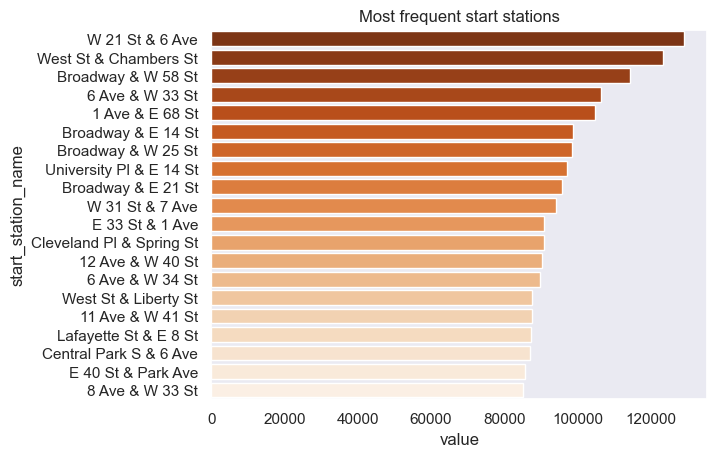

In [34]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette = ('Oranges_r'))
plt.title("Most frequent start stations")
plt.show()

In [36]:
# Showing the least used stations
bottom20 = df_t.nsmallest(20, 'value')
bottom20

,start_station_name,value
1388,Schermerhorn St and Court St,2
1398,Sharon St & Olive St_new,3
830,E 6 St 2 Ave,6
1136,Lexington Ave & Stuyvesant Ave,8
1623,W 40 St & 8 Ave,8
905,Folin St & E 181 St,15
603,College Ave & E 169 St,16
1142,Lincoln Pl & Nostrand Ave,17
582,Church St & Thomas St,18
1216,Morgan Bike Mechanics,21


C:\Users\aaron\AppData\Local\Temp\ipykernel_109440\1798151028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = bottom20, x = 'value', y = 'start_station_name', palette = ('Oranges_r'))


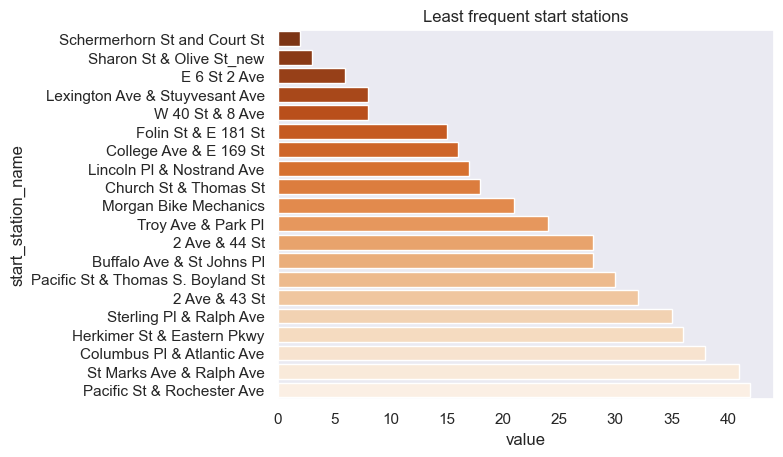

In [38]:
sns.barplot(data = bottom20, x = 'value', y = 'start_station_name', palette = ('Oranges_r'))
plt.title("Least frequent start stations")
plt.show()

I think that this color palette works very well. The dark brown really pops out at you.

Though to make these graphs, I did have to put in the palette settings into the code. When I didn't all of the columns were one color.

## Part 5

In [43]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [45]:
# Adding new column

df_group.rename(columns = {'ride_id':'daily_bike_rides'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

_merge
both          29838166
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 18)
Shape of January 2nd is (43009, 18)


In [47]:
df.drop(columns = {'_merge'}, inplace = True)

In [49]:
df_temp.drop(columns = {'_merge'}, inplace = True)

In [51]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value,daily_bike_rides
0,291C8B1D2F451F20,classic_bike,2022-01-01 01:41:45.865,2022-01-01 02:19:07.819,Central Park West & W 76 St,7253.04,5 Ave & E 78 St,7161.08,40.778968,-73.973747,40.776321,-73.964274,casual,2022-01-01,11.6,1,20428
1,EE55558726CC75A7,classic_bike,2022-01-01 03:39:20.314,2022-01-01 03:47:43.294,E 88 St & 1 Ave,7235.13,5 Ave & E 87 St,7323.09,40.778301,-73.948813,40.782323,-73.959875,casual,2022-01-01,11.6,1,20428
2,BAE74126E17B6794,electric_bike,2022-01-01 17:33:03.958,2022-01-01 17:43:13.897,Metropolitan Ave & Bedford Ave,5308.04,Montrose Ave & Bushwick Ave,5068.02,40.715348,-73.960241,40.707678,-73.940162,casual,2022-01-01,11.6,1,20428
3,F4151B16DDFE3052,classic_bike,2022-01-01 14:31:52.691,2022-01-01 14:54:30.877,W 21 St & 6 Ave,6140.05,West End Ave & W 60 St,7059.08,40.741740,-73.994156,40.772370,-73.990050,member,2022-01-01,11.6,1,20428
4,E87EDCD278436C83,classic_bike,2022-01-01 14:52:25.593,2022-01-01 15:12:10.330,5 Ave & E 87 St,7323.09,Frederick Douglass Blvd & W 117 St,7688.12,40.782323,-73.959875,40.805159,-73.954692,member,2022-01-01,11.6,1,20428


In [53]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,daily_bike_rides
date,,,,,,,,,,,,,,,,
2022-01-01,291C8B1D2F451F20,classic_bike,2022-01-01 01:41:45.865,2022-01-01 02:19:07.819,Central Park West & W 76 St,7253.04,5 Ave & E 78 St,7161.08,40.778968,-73.973747,40.776321,-73.964274,casual,11.6,1,20428
2022-01-01,EE55558726CC75A7,classic_bike,2022-01-01 03:39:20.314,2022-01-01 03:47:43.294,E 88 St & 1 Ave,7235.13,5 Ave & E 87 St,7323.09,40.778301,-73.948813,40.782323,-73.959875,casual,11.6,1,20428
2022-01-01,BAE74126E17B6794,electric_bike,2022-01-01 17:33:03.958,2022-01-01 17:43:13.897,Metropolitan Ave & Bedford Ave,5308.04,Montrose Ave & Bushwick Ave,5068.02,40.715348,-73.960241,40.707678,-73.940162,casual,11.6,1,20428
2022-01-01,F4151B16DDFE3052,classic_bike,2022-01-01 14:31:52.691,2022-01-01 14:54:30.877,W 21 St & 6 Ave,6140.05,West End Ave & W 60 St,7059.08,40.741740,-73.994156,40.772370,-73.990050,member,11.6,1,20428
2022-01-01,E87EDCD278436C83,classic_bike,2022-01-01 14:52:25.593,2022-01-01 15:12:10.330,5 Ave & E 87 St,7323.09,Frederick Douglass Blvd & W 117 St,7688.12,40.782323,-73.959875,40.805159,-73.954692,member,11.6,1,20428


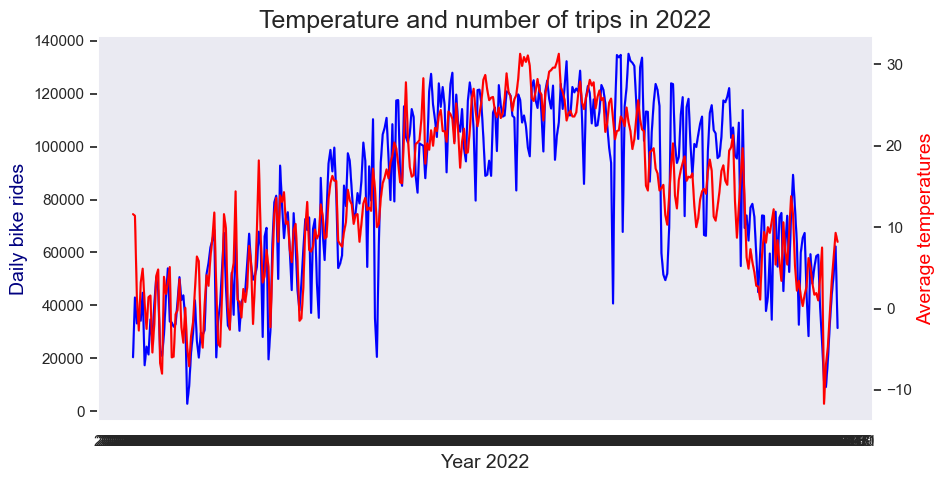

In [55]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['daily_bike_rides'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily bike rides",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and number of trips in 2022', fontsize = 18)
plt.show()

Not sure why the year lables are like that

## Part 6

C:\Users\aaron\AppData\Local\Temp\ipykernel_109440\2192968829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'start_lat', data = df, palette = ('Oranges_r'))


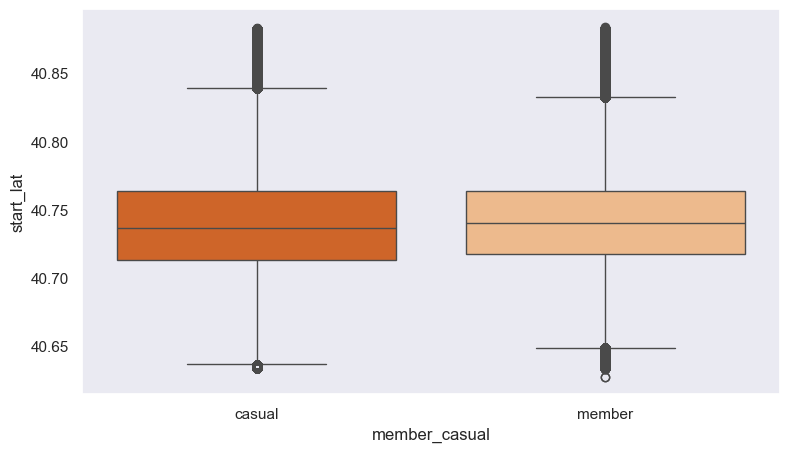

In [67]:
# Making a box plot
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'start_lat', data = df, palette = ('Oranges_r'))
plt.show()

First of my data set doesn't have a value like age for me to compare too, like in the example notebook. So this is the best that I could do with the data I have. From the box plots casual riders have a lot more varied in latitudes of starting stations, while member riders are more compacted in stations with lower differences in latitude. Also there are a lot of "outliers" in both groups acording to the box plots.

## Part 7

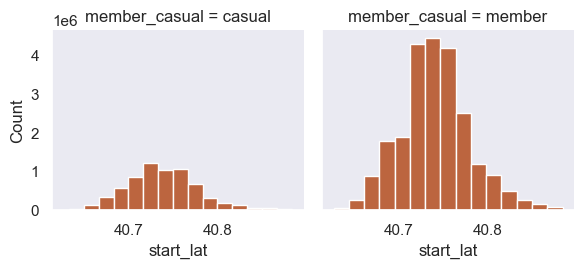

In [79]:
# Making a FacetGrid plot
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "start_lat", bins = 15)
plt.show()

With this graph we can see that there are far more member riders than casual riders. Also most rides are starting in the center of New York City, latitude wise, compared to people starting there rides more north or south of the city center.